# F. Finding correlations

In [7]:
# Import the usual stuff as well as the database as cleaned & processed in task A.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
# # Import the database as cleaned & processed in task A.
df = pd.read_csv('task A.csv', index_col=0)
df

,code,creator,created_datetime,last_modified_datetime,product_name,brands,countries_en,ingredients_text,fat_100g,carbohydrates_100g,proteins_100g,nutrition-score-uk_100g
0,4559,usda-ndb-import,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,United States,"peanuts, wheat flour, sugar, rice flour, tapio...",17.86,60.71,17.86,0.0
1,16087,usda-ndb-import,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,United States,"organic hazelnuts, organic cashews, organic wa...",57.14,17.86,17.86,12.0
2,16124,usda-ndb-import,2017-03-09T10:35:11Z,2017-03-09T10:35:12Z,Organic Muesli,Daddy's Muesli,United States,"org oats, org hemp granola (org oats, evaporat...",18.75,57.81,14.06,7.0
3,16872,usda-ndb-import,2017-03-09T10:34:10Z,2017-03-09T10:34:11Z,Zen Party Mix,Sunridge,United States,"roasted peanuts (peanuts, peanut or canola oil...",36.67,36.67,16.67,12.0
4,18012,usda-ndb-import,2017-03-09T10:34:12Z,2017-03-09T10:34:13Z,Cinnamon Nut Granola,Grizzlies,United States,"organic rolled oats, honey, raisins, almonds, ...",18.18,60.00,14.55,0.0
5,18050,usda-ndb-import,2017-03-09T09:07:42Z,2017-03-09T09:07:42Z,Organic Hazelnuts,Grizzlies,United States,organic raw hazelnuts,60.71,17.86,14.29,0.0
6,18265,usda-ndb-import,2017-03-09T10:35:06Z,2017-03-09T10:35:06Z,Energy Power Mix,Sunridge,United States,"yogurt raisins, tamari roasted almonds, organi...",17.50,42.50,7.50,14.0
7,18289,usda-ndb-import,2017-03-09T10:34:14Z,2017-03-09T10:34:15Z,Antioxidant Mix - Berries & Chocolate,Sunridge,United States,"chocolate stars (dehydrated cane juice, sweete...",33.33,46.67,13.33,15.0
8,18319,usda-ndb-import,2017-03-09T10:35:20Z,2017-03-09T10:35:20Z,Organic Quinoa Coconut Granola With Mango,Sunridge,United States,"organic rolled oats, organic evaporated cane j...",10.91,69.09,10.91,7.0
9,18340,usda-ndb-import,2017-03-09T10:35:21Z,2017-03-09T10:35:21Z,Fire Roasted Hatch Green Chile Almonds,Sunridge,United States,"dry roasted almonds, hatch green chile seasoni...",50.00,23.33,6.67,11.0


In [9]:
# We're supposed to find correlations between the different data fields here, and more specifically "to identify the
# variables which most affect the nutritional score and provide some insight into which factors cause both a low or a high
# nutritional score". Well, I kept only macronutrients columns in my dataframe and therefore will be able to only to
# which one of the 3 macronutrients most affect the nutritional score. It sure would have been interesting to retain other
# data for this analysis, like saturated fat, trans fat, salt, etc.

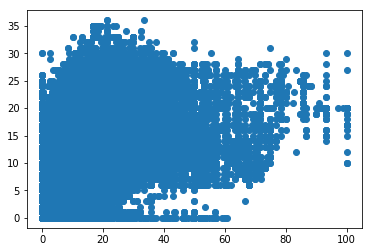

In [10]:
# Correlation between fat and the nutrition score.
# First the visual way.
plt.scatter(df['fat_100g'],df['nutrition-score-uk_100g'])
plt.show()

In [11]:
# Finding the correlation the NumPy way.
np.corrcoef(df['fat_100g'],df['nutrition-score-uk_100g'])

array([[ 1.        ,  0.51441339],
       [ 0.51441339,  1.        ]])

In [12]:
# Finding the correlation the pandas way.
df['fat_100g'].corr(df['nutrition-score-uk_100g'])

0.5144133852729551

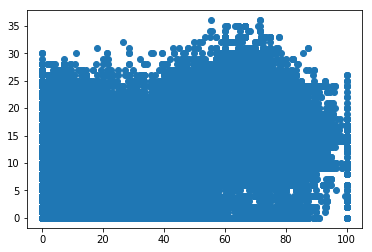

In [13]:
# Correlation between carbs and the nutrition score.
# First the visual way.
plt.scatter(df['carbohydrates_100g'],df['nutrition-score-uk_100g'])
plt.show()

In [14]:
# Finding the correlation the NumPy way.
np.corrcoef(df['carbohydrates_100g'],df['nutrition-score-uk_100g'])

array([[ 1.        ,  0.30009281],
       [ 0.30009281,  1.        ]])

In [15]:
# Finding the correlation the pandas way.
df['carbohydrates_100g'].corr(df['nutrition-score-uk_100g'])

0.30009280773543051

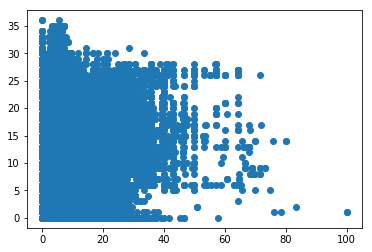

In [16]:
# Correlation between carbs and the nutrition score.
# First the visual way.
plt.scatter(df['proteins_100g'],df['nutrition-score-uk_100g'])
plt.show()

In [17]:
# Finding the correlation the NumPy way.
np.corrcoef(df['proteins_100g'],df['nutrition-score-uk_100g'])

array([[ 1.        ,  0.20271376],
       [ 0.20271376,  1.        ]])

In [18]:
# Finding the correlation the pandas way.
df['proteins_100g'].corr(df['nutrition-score-uk_100g'])

0.20271376072625891

In [19]:
# All 3 macronutrients are positively correlated to the nutrition score at different levels, though.
# Fat is the macronutrient that affects the most the nutrition score, whereas proteins the least.

In [20]:
# Quick other step:
df_num=pd.concat([df['proteins_100g'],df['fat_100g'],df['carbohydrates_100g'],df['nutrition-score-uk_100g']],axis=1)
df_num.head()

,proteins_100g,fat_100g,carbohydrates_100g,nutrition-score-uk_100g
0,17.86,17.86,60.71,0.0
1,17.86,57.14,17.86,12.0
2,14.06,18.75,57.81,7.0
3,16.67,36.67,36.67,12.0
4,14.55,18.18,60.00,0.0


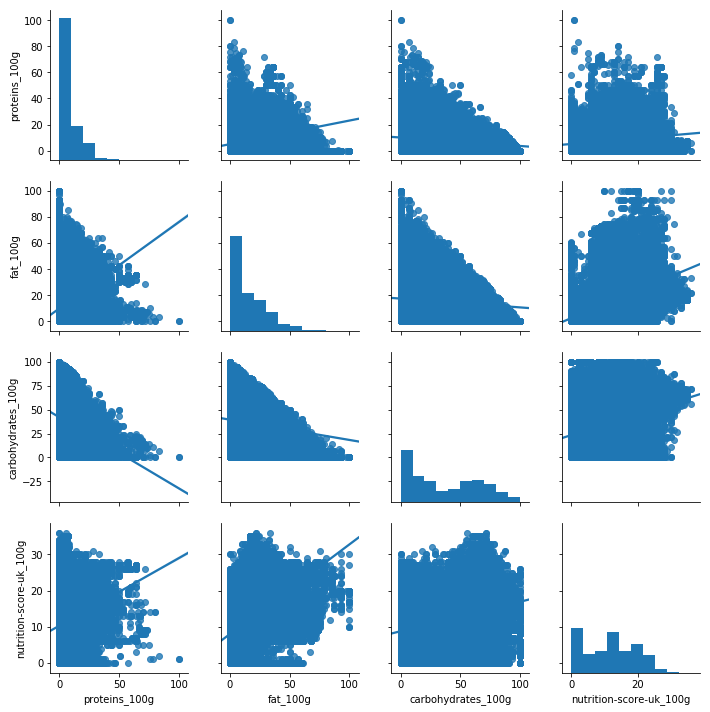

In [21]:
# This can also be verified in the linear regressions. The regression line with the steepest gradient is in the scatter chart
# of fat vs. nutrition score, whereas it is the lowest in the scatter chart of proteins vs. nutrition score.
sns.pairplot(df_num, kind='reg')

In [22]:
# End of task F.